In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from numpy.fft import fft
from numpy.fft import fftfreq
from scipy import signal

__Question 1__

(a)  (2 points)  Make a plot of all the data, with $\delta^{18}O$ on the y-axis and age (in ka., or thousandsof years before present) on the x-axis.  On the same figure, plot again the data from the two time intervals that you will be analyzing separately below (interval 1:between 0 and 599.5 ka.,interval 2: between 1500 and 2998 ka.).  Your plot should have three colors:  oneto indicate interval 1, another for interval 2 and a third for the rest of the data.  What isthe time resolution (dt) for each interval?

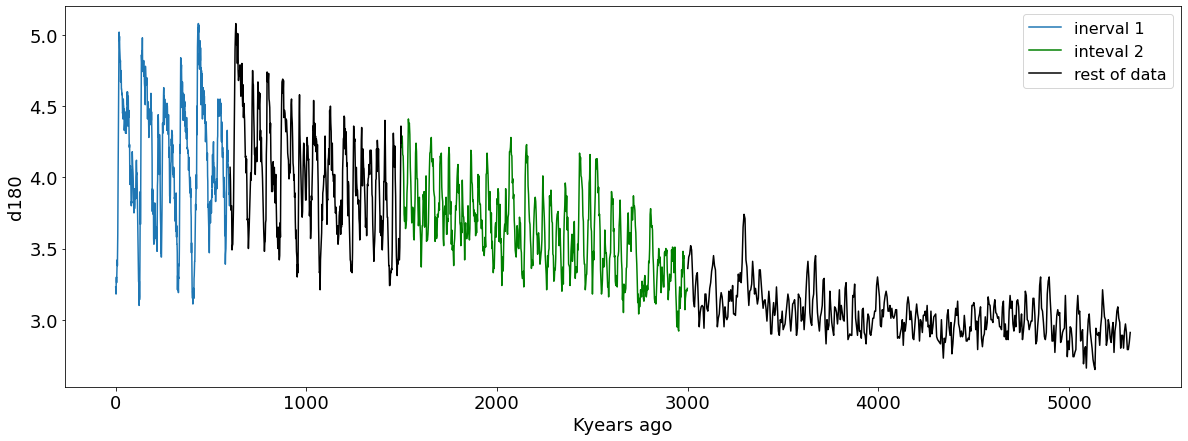

In [2]:
LRO4 = pd.read_csv('LR04.csv')

interval_1 = LRO4[LRO4.age_ka <= 599.5]
interval_2 = LRO4[(LRO4.age_ka >= 1500) & (LRO4.age_ka <= 2998)]
rest_of_data_1 = LRO4[(LRO4.age_ka > 599.5) & (LRO4.age_ka < 1500)]
rest_of_data_2 = LRO4[LRO4.age_ka > 2998]

plt.figure(figsize=(20,7))
plt.rc('font', size=18) 
plt.plot(interval_1.age_ka, interval_1.d18o)
plt.plot(interval_2.age_ka, interval_2.d18o, 'g')
plt.plot(rest_of_data_1.age_ka, rest_of_data_1.d18o, 'k')
plt.plot(rest_of_data_2.age_ka, rest_of_data_2.d18o, 'k')
plt.legend(['inerval 1', 'inteval 2', 'rest of data'], prop={'size': 16})
plt.xlabel('Kyears ago')
plt.ylabel('d180');

In [3]:
res1 = np.diff(interval_1.age_ka)[0]
res2 = np.diff(interval_2.age_ka)[0]
print(f'The first interval has a time resolution of {res1}')
print(f'The second interval has a time resolution of {res2}')

The first interval has a time resolution of 1.0
The second interval has a time resolution of 2.5


(b)  (2 points)  Perform a discrete Fourier transform of the raw data from interval 1 (i.e.,  donot process or modify in any way).  Make a figure with two subplots, with the upper sub-plot showing $\delta^{18}O$ vs. age and the lower sub-plot of showing its DFT frequency spectrum(frequency on the x-axis and amplitude on the y-axis).  What is the dominant peak, and what feature of the raw data does this peak correspond to?

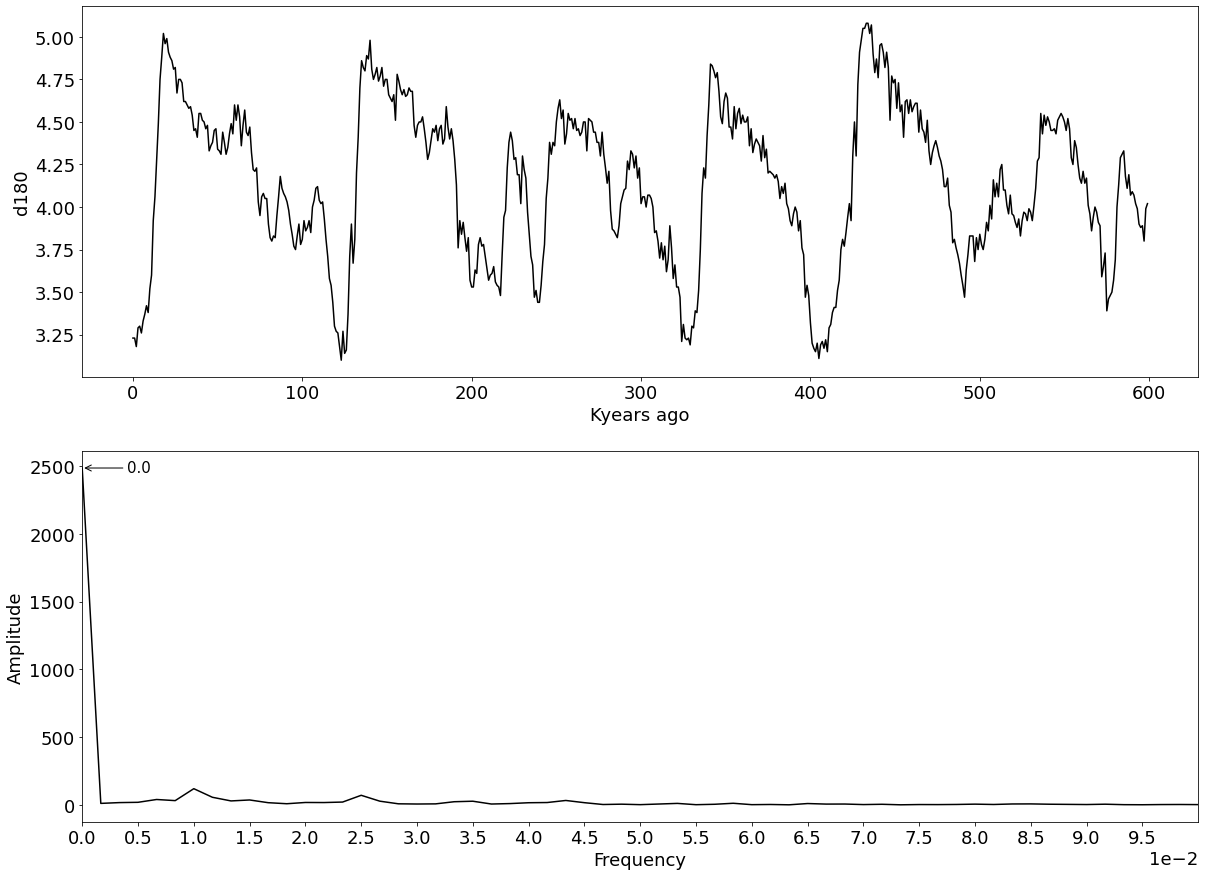

In [4]:
def make_plots(data1, data2, figsize=(20,15), title = None,
     xflim= None, xlabel = None, ylabel=None, xfticks = None,
     arrows = None, arrow_style = '->'):
    x1, y1 = data1[0], data1[1]
    x2, y2 = data2[0], data2[1]
    
    #plot data1
    plt.figure(figsize=figsize)
    plt.rc('font', size=18) 
    plt.subplot(2,1,1)
    plt.plot(x1, y1, 'k')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    #plot data 2
    plt.subplot(2,1,2)
    plt.plot(x2, y2, 'k')
    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')
    plt.xlim(xflim)
    plt.xticks(xfticks)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if arrows:
        lenght, size, idxs = arrows
        for idx in idxs:
            plt.gca().annotate(str(round(x2[idx],3)), xy=(x2[idx], y2[idx]),
                xytext=(x2[idx] + lenght, y2[idx] + lenght),
                arrowprops={'arrowstyle': arrow_style}, va='center',
                size = size)

def do_fft(y, sample_spacing, zero_mean=False, detrend=False):
    N = len(y)

    if zero_mean:
        y = y - np.mean(y)
    if detrend:
        y = signal.detrend(y)
    
    xf = fftfreq(N, sample_spacing)
    yf = fft(y)
    return np.abs(xf[:N//2+1]), np.abs(yf[:N//2+1]), y

xf, yf, y = do_fft(interval_1.d18o, 1) 

make_plots((interval_1.age_ka, y), (xf, yf), xflim=(0,0.1), xlabel='Kyears ago',
    ylabel = 'd180', xfticks = np.arange(0,0.1, 0.005), arrows=(4e-3, 15, [0]))

The dominant peak is located at a frecuency of zero. This occurs because we have not extracted the mean from the raw data. 

c)  (2 points)  Now,  subtract  away  the  mean  of  the  interval  1  dataset  (sonewdata = data- np.mean(data)),  and  then  perform  a  discrete  Fourier  transform  of  this  “zero-mean”data.  Make a figure with two subplots, with the upper sub-plot showing $\delta^{18}O$ (zero-mean) vs. age and the lower sub-plot of showing its DFT frequency spectrum (frequency on thex-axis and amplitude on the y-axis).  What has changed about the DFT?

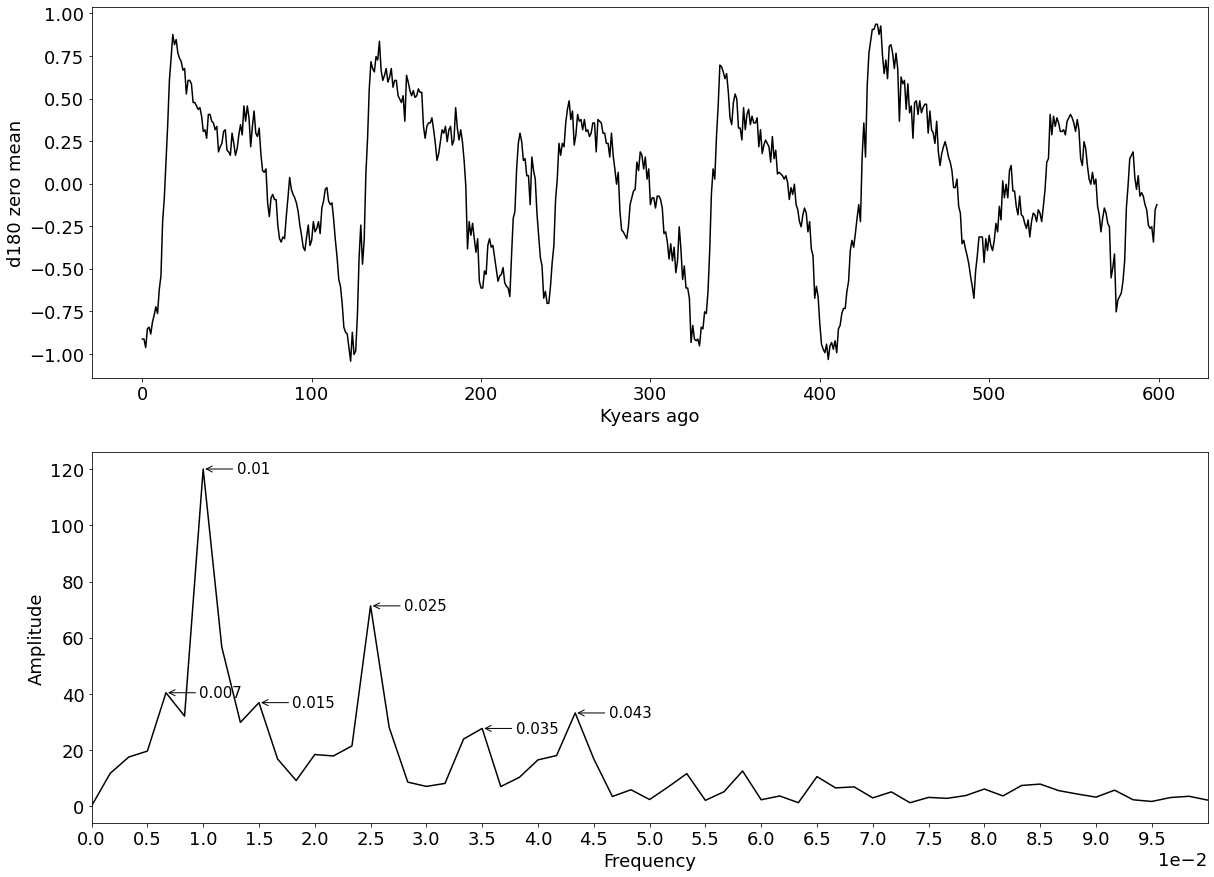

In [5]:
xf, yf, y = do_fft(interval_1.d18o, 1, zero_mean=True) 

make_plots((interval_1.age_ka, y), (xf, yf), xflim=(0,0.1), xlabel='Kyears ago',
    ylabel = 'd180 zero mean', xfticks = np.arange(0,0.1, 0.005),
    arrows=(3e-3, 15, [4, 6, 9, 15, 26, 21]))


Extracting the mean, the peak at zero frequency disapperaed.

(d)  (2 points)  What are the significant peaks in the DFT of the zero-mean, interval 1 dataset? Using your knowledge of Earth system science, what do these peaks correspond to?  When considering “significance,” look for peaks that are local maxima in the spectra.  Are somepeaks more clear than others?

I identified six peaks in the DFT of the zero mean interval 1. As shown in the last figure, these peaks are located at frequencies 0.007, 0.01, 0.015, 0.025, 0.035 and 0.043. The most significant peaks are the ones located at 0.01, 0.025 and .043 because they are the highest and easiest to identify local maxima. These peaks correspond to perodicities of $\frac{1}{0.01} = 100y$, $\frac{1}{0.025} = 40y$, and $\frac{1}{0.043}=23.25y$. These periodicities correspond to the periodicities of the excentricity, obliquity and presecion cycles.

(e)  (2 points)  Let us turn to interval 2 now.  As you did in question 1c, first remove the mean from the interval 2 data, and then perform a discrete Fourier transform. Make a figure with two subplots, with the upper sub-plot showing $\delta^{18}O$ (zero-mean) from interval 2 vs. age,and the lower sub-plot showing its DFT frequency spectrum (frequency on the x-axis and amplitude  on  the  y-axis).   Which  frequency  explains  the  most  variance  in  the  analyzed data, and how do you account for this peak?

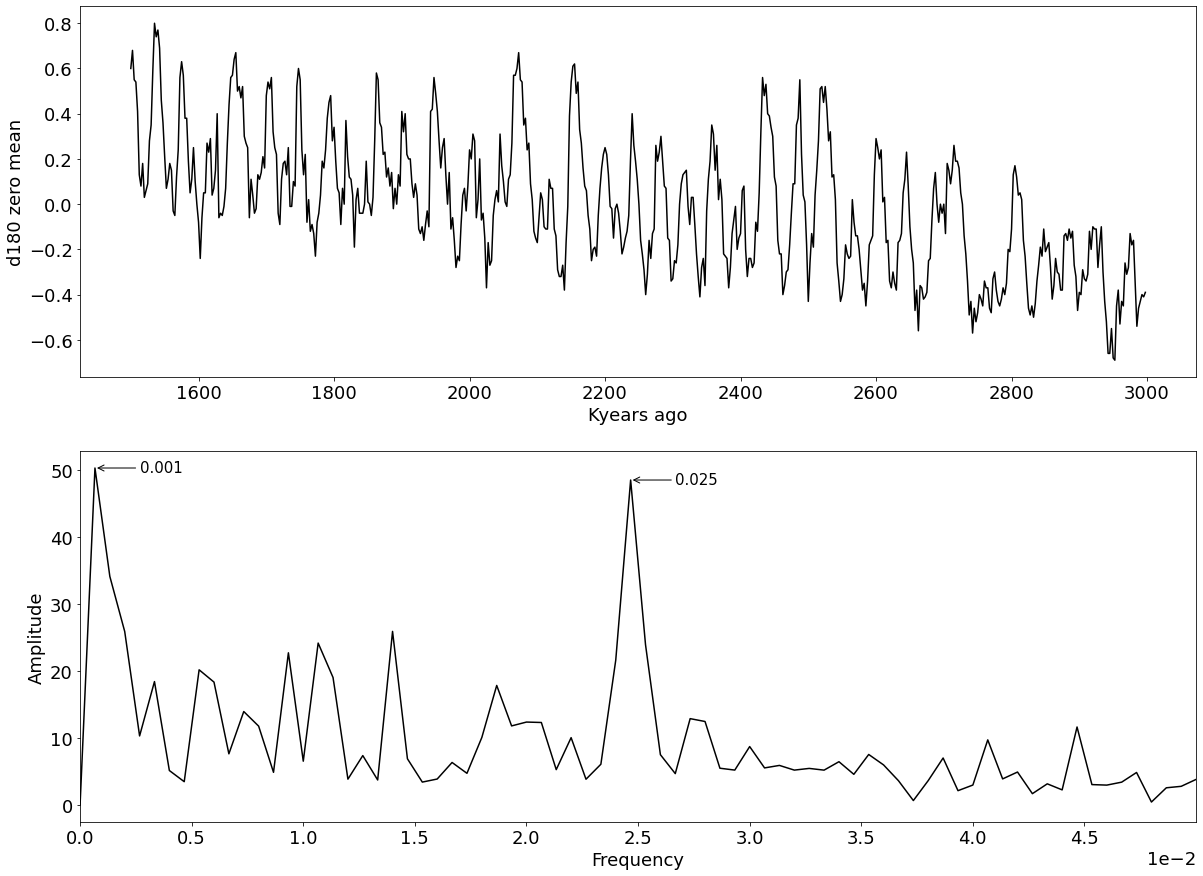

In [6]:
xf, yf, y = do_fft(interval_2.d18o, 2.5, zero_mean=True) 

make_plots((interval_2.age_ka, y), (xf, yf), xflim=(0,0.05), 
    ylabel = 'd180 zero mean', xlabel='Kyears ago',
    xfticks = np.arange(0,0.05, 0.005), 
    arrows=(2e-3, 15, [1,37]))

There are 2 peaks in the DFT of the zero mean interval 2 data: one at 0.001 and one at 0.025. The peak at 0.001 might be the result of the linear trend in the interval 2 data.

(f)  (2 points)  Now,  for  interval  2,  remove  both  mean  of  the  data  and  the  linear  trend  be-fore  performing  the  DFT.  A  nifty  way  of  doing  this  in  Python  uses  the signal sub-module  from scipy(from scipy import signal).   Once  imported,  typing newdata =signal.detrend(data) will remove BOTH the mean and any linear trend in the dataset. Make a figure with two subplots, with the upper sub-plot showing $\delta^{18}O$ (de-trended and zero-mean)  vs.  age  from  interval  2,  and  the  lower  sub-plot  showing  its  DFT  frequency spectrum (frequency on the x-axis and amplitude on the y-axis).  How does this spectra compared to the spectra for interval 1 that you produced in question 1d

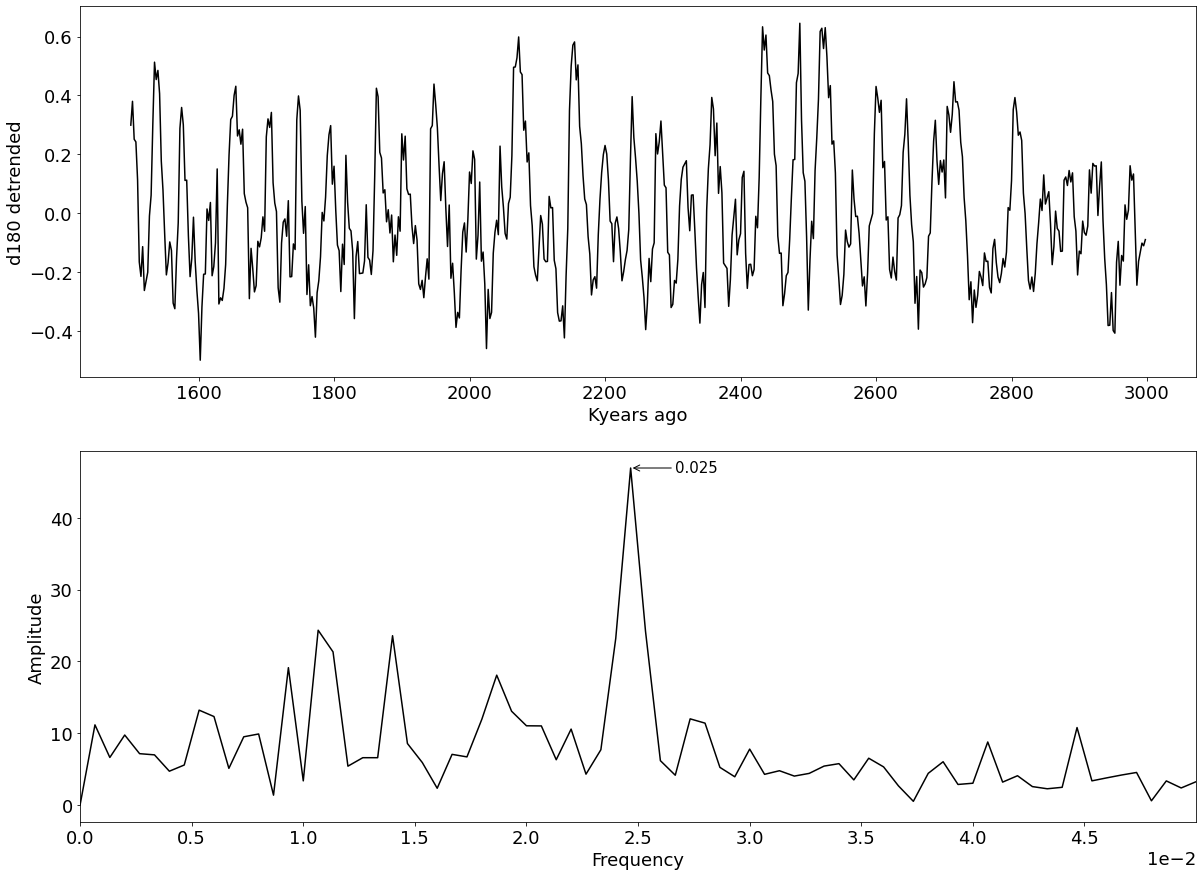

In [7]:
xf, yf, y = do_fft(interval_2.d18o, 2.5, detrend=True) 

make_plots((interval_2.age_ka, y), (xf, yf), xflim=(0,0.05),
    ylabel = 'd180 detrended', xlabel='Kyears ago',
    xfticks = np.arange(0,0.05, 0.005),
    arrows=(2e-3, 15, [37]))

Detrinding the data removed the peak at 0.001, and we are only left with a significant peak at 0.025. In contrast with the 3 significant peaks of the spectra for interval 1, this spectra has only one significant peak. This peak corresponds to a periodicity of $2.5/0.025=100y$. As a result, it appears that this interval only captures the periodicity of excentricity

g)  (2 points)  Taking  a  step  back  to  your  figure  from  1a,  what  do  these  analyses  suggest about the important controls on climate for the last 5 million years?  Why is this dataset an appropriate one to ask this question

This analyses suggest that the Milankovitch cycles of excentricity, obliquity and precesion are important controls on climate for the las 5 million years, This dataset is appropriate to ask this question because it is large enough to capture the periodicities of the Milankovitch cycles, and because the intervals analized have a constant time step. Also,a dataset of $\delta^{18}O$ is appropiate for investigating climate because it is a proxy of temperature. Since it is lighter, $^{16}O$ evaporates more easily than $^{18}O$. As result, during cold climates the $^{16}O$ evaporated is trasnfered to and trapped in ice caps and the ocean becomes rich in $^{18}O$. In contrast during warm climates the ice melts and release $^{16}O$, so the ocean becomes enriched in $^{16}O$. Thus $\delta^{18}O$ is an apporpiate record for studying climate. 

__Question 2__

The file mystery.csv is a list of lamina thicknesses (N = 208) in units of millimeters.  The first row has the oldest lamina, and the last is the youngest.  Each lamina is defined by a coarser, sandy layer at the base and a fine mud cap at its top (a sand-mudcouplet).

(a)  (3 points)  For the data in mystery.csv, first remove both the mean and any linear trendin the couplet thickness data.  Make a figure with two subplots, with the upper sub-plotshowing couplet thickness (de-trended and zero-mean) on the y-axis vs. couplet number on the x-axis, and the lower sub-plot showing its DFT frequency spectrum (frequency on the x-axis,  and amplitude on the y-axis).  What is the dominant frequency?  Given the units for couplet thickness (these couplets are teeny-tiny!)  and this frequency, what signal do you think is being recorded here?


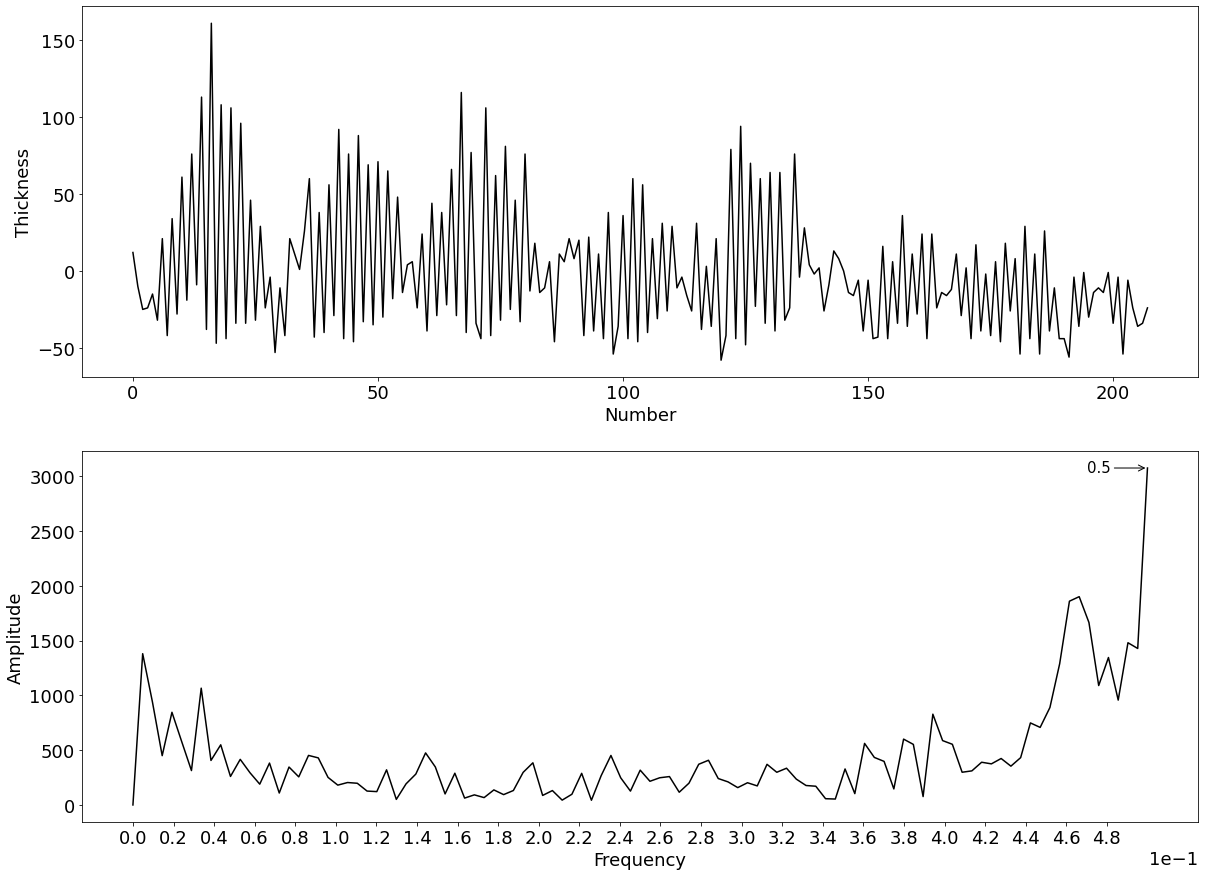

In [8]:
mystery = pd.read_csv('mystery.csv')

xf, yf, y = do_fft(mystery.thickness_mm, 1, zero_mean=True) 

make_plots((mystery.index, y), (xf, yf), ylabel='Thickness',
    xlabel='Number', xfticks = np.arange(0,0.5, 0.02),
    arrows=(-0.03, 15, [-1]))

The dominant frequency of the spectrum is located at 0.5, wich correspond to 1 cycle every two couplets. This could be recording the cycle of daily tides.

(b)  (3 points)  A  high  frequency  signal  dominates  the  DFT  of  this  couplet  dataset.   To  ex-plore whether lower frequencies signals are also present and significant, load the datafilesmoothed-mystery.csv, which is a 7-point running mean of the couplet dataset.  Remove both the mean and any linear trend from this smoothed dataset, and make a figure withtwo subplots.  The upper sub-plot will show couplet thickness (smoothed, de-trended andzero-mean)  on  the  y-axis  vs.  couplet  number  on  the  x-axis,  and  the  lower  sub-plot  willshow its DFT frequency spectrum (frequency on the x-axis, and amplitude on the y-axis).What is the dominant frequency?  Given your answer to question 2a, what signal do youthink is being recorded here?

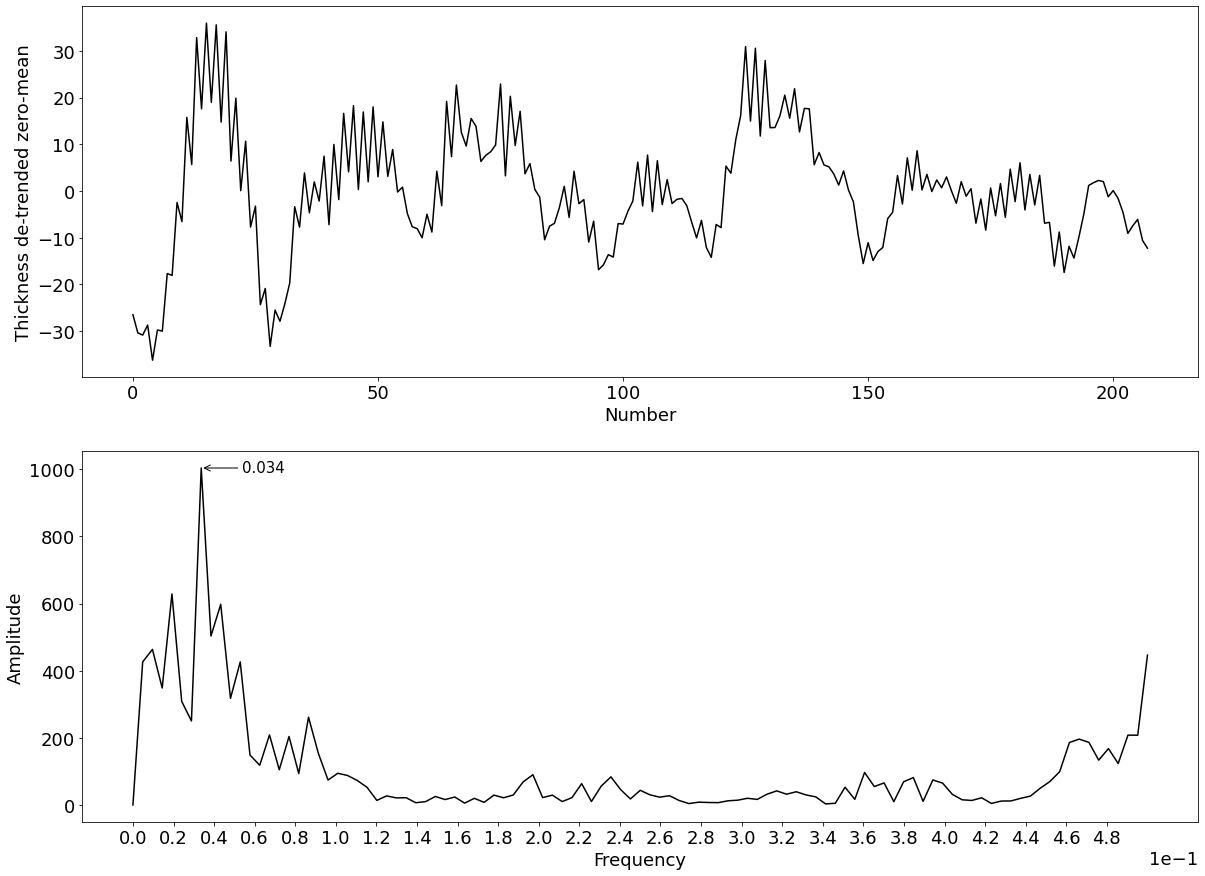

In [9]:
smoothed_mystery = pd.read_csv('smoothed-mystery.csv')

xf, yf, y = do_fft(smoothed_mystery.thickness_mm,
     1, detrend=True, zero_mean=True) 

make_plots((smoothed_mystery.index, y), (xf, yf),
    ylabel='Thickness de-trended zero-mean', 
    xlabel='Number', xfticks = np.arange(0,0.5, 0.02),
    arrows=(0.02, 15, [7]))

The dominant frequency is located at a frequency of 0.034, and corresponds to $\frac{1}{0.034}=29.41$ couplets per cycle. This frequency might be recording tide related cycles associated with the lunar synodic cycle.